In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings. filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df=pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

In [3]:
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [4]:
df.isnull().sum()

,0
title,1
link,2
published_date,1
is_hourly,1
hourly_low,36957
hourly_high,37922
budget,38441
country,1585


In [5]:
# Calculate the split point
split_point = int(0.05 * len(df))

# Split the DataFrame
df1 = df.iloc[:split_point]
df2 = df.iloc[split_point:]

print(f"df1 shape: {df1.shape}")
print(f"df2 shape: {df2.shape}")


df1 shape: (3264, 8)
df2 shape: (62034, 8)


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return [] # Return an empty list for non-string values

df1['keywords'] = df1['title'].apply(extract_keywords)


**Treat the null values present in Budget column based on the sentiment . The sentiment has to be a combination of country name, the key word and the median salary., use appropriate nltk library for sentiment analysis**

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') # Download VADER lexicon for sentiment analysis
nltk.download('punkt')
nltk.download('punkt_tab')

#df=pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

df1['keywords'] = df1['title'].apply(extract_keywords)

# Calculate median salary (replace with your actual salary column if different)
median_salary = df1['budget'].median()

# Function to analyze sentiment and fill null budget values
def fill_budget_by_sentiment(row):
    if pd.isnull(row['budget']):
        try:
            analyzer = SentimentIntensityAnalyzer()
            text = str(row['title']) + ' ' + str(row['country']) # Combine relevant text
            scores = analyzer.polarity_scores(text)

            if scores['compound'] >= 0.05:
                return median_salary * 1.1  # Increase budget for positive sentiment
            elif scores['compound'] <= -0.05:
                return median_salary * 0.9 # Decrease budget for negative sentiment
            else:
                return median_salary      # Keep as median for neutral sentiment
        except Exception as e: #Handle exceptions for unexpected issues
          print(f"Error processing row: {e}")
          return median_salary #Fallback: if an error happens, return median salary
    else:
        return row['budget']

df1['budget'] = df1.apply(fill_budget_by_sentiment, axis=1)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
df1['budget'].isnull().sum()

0

**Treat the null values present in country feature with mode value in the data frame**

In [11]:
# Fill missing 'country' values with the mode
country_mode = df1['country'].mode()[0]
df1['country'].fillna(country_mode, inplace=True)


In [12]:
df1.isnull().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,1881
hourly_high,1930
budget,0
country,0
keywords,0


In [13]:
df1.head(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,United States,"[Experienced, Media, Buyer, For, Solar, Pannel..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States,"[Full, Stack, Developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,110.0,United States,"[SMMA, Bubble, App]"
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,110.0,United States,"[Talent, Hunter, Specialized, in, Marketing]"
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India,"[Data, Engineer]"


**Content-based filtering is more appropriate. We can use the 'title', 'keywords', 'description' (if available), 'country'
 to recommend similar jobs.**

In [14]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_filtering(df, job_index, top_n=5):
    """
    Recommends similar jobs based on content.
    """

    # Combine relevant text features for better representation
    df1['combined_features'] = df1['title'] + ' ' + df1['country'] + ' ' + ' '.join(df1['keywords'].astype(str))


    # TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['combined_features'])


    # Calculate cosine similarity
    similarity_scores = cosine_similarity(tfidf_matrix[job_index], tfidf_matrix)


    # Get indices of top similar jobs
    similar_job_indices = similarity_scores.argsort()[0][::-1][1:top_n+1] # Exclude the job itself


    return df.iloc[similar_job_indices]


# Example usage (assuming you want recommendations for the first job in df1)
recommendations = content_based_filtering(df1, 0)
print(recommendations[['title', 'country', 'budget']]) # Print relevant columns


                        title        country  budget
2063  Media Buyer #2  YouTube  United States   650.0
2155  Experienced Ghostwriter  United States   500.0
1289                Media Kit  United States   110.0
2374             Social Media  United States   110.0
1394                  Illustr  United States   110.0


**Based on collaborative filtering take input from user and based on the key word and country mentioned by user ,recommend jobs to users**

In [17]:
def recommend_jobs(keyword, country, top_n=5):
    """
    Recommends jobs based on keyword and country using content-based filtering.
    """

    # Filter jobs by country
    country_jobs = df1[df1['country'] == country]

    if country_jobs.empty:
        print(f"No jobs found for the country: {country}")
        return pd.DataFrame()

    # Combine relevant text features
    country_jobs['combined_features'] = country_jobs['title'] + ' ' + country_jobs['country'] + ' ' + ' '.join(country_jobs['keywords'].astype(str))

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(country_jobs['combined_features'])

    # Transform the keyword into a vector
    keyword_vector = vectorizer.transform([keyword])

    # Calculate cosine similarity between the keyword and all job descriptions
    similarity_scores = cosine_similarity(keyword_vector, tfidf_matrix)

    # Get indices of top similar jobs
    similar_job_indices = similarity_scores.argsort()[0][::-1][:top_n]  # Top N recommendations

    return country_jobs.iloc[similar_job_indices]


# Example usage
keyword = input("Enter a keyword: ")
country = input("Enter a country: ")

recommendations = recommend_jobs(keyword, country)
print(recommendations[['title', 'country', 'budget']])


Enter a keyword: Data
Enter a country: United States
                               title        country  budget
2449                Data Entry Clerk  United States   110.0
1508               Small Data Visula  United States    15.0
601                 Data Input Excel  United States   110.0
80    Data Entry - Tracking Expenses  United States   110.0
1067             Cloud Data Engineer  United States   110.0


**Use Machine Learning Model ike svc,random forest along with collaboratibe filtering to train the model with input as keyword and country and output as the recommendation. predict the accuracy of each of models. make it a classification problem**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Prepare data for classification
# Assuming 'title', 'country', and a 'recommendation_category' are available
# 'recommendation_category' represents the output classification (e.g., job type)
# You might need to engineer a 'recommendation_category' column from your data
# Example: Map job titles to broader categories

# Create a label encoder for the target variable
le = LabelEncoder()
df1['recommendation_category'] = le.fit_transform(df1['title']) # Example: encoding job titles


# Feature extraction (example using TF-IDF)
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df1['title'] + ' ' + df1['country'])  # Combine title and country for features

# Encoding the country
le_country = LabelEncoder()
df1['country_encoded'] = le_country.fit_transform(df1['country'])
X_country = df1[['country_encoded']]

X = np.hstack((X_text.toarray(), X_country))
y = df1['recommendation_category']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f"SVC Accuracy: {svc_accuracy}")

# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")


SVC Accuracy: 0.004083299305839118


**Save the response in .pkl file**

In [ ]:
import pickle

# Assuming 'recommendations' is the variable you want to save
with open('recommendations.pkl', 'wb') as file:
    pickle.dump(recommendations, file)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.sparse import hstack




# Prepare the data
# Combine keywords into a single string
df1['keywords_str'] = df1['keywords'].apply(lambda x: ' '.join(x))
df1.dropna(subset=['title'], inplace=True)  # Handle NaN in target variable

# Define features (X) and target (y)
X = df1[['keywords_str', 'country', 'budget']]
y = df1['title']  # Assuming 'title' represents the job title

# Use LabelEncoder instead of pd.get_dummies
label_encoder = LabelEncoder()
X['country'] = label_encoder.fit_transform(X['country'])

# Split the data FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now apply vectorization to training and testing data separately
vectorizer = TfidfVectorizer(max_features=5000)  # Set a max to control vocabulary size
X_train_keywords = vectorizer.fit_transform(X_train['keywords_str'])
X_test_keywords = vectorizer.transform(X_test['keywords_str'])

# Select the numeric features from your DataFrame
X_train_num = X_train[['budget', 'country']]
X_test_num = X_test[['budget', 'country']]

# Apply PCA before combining features
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_num_pca = pca.fit_transform(X_train_num)
X_test_num_pca = pca.transform(X_test_num)

# Combine text features and numeric features using hstack
X_train_final = hstack([X_train_keywords, X_train_num_pca])
X_test_final = hstack([X_test_keywords, X_test_num_pca])

# Initialize and train the models
# Initialize and train the Logistic Regression model
#model = LogisticRegression(max_iter=100)  # Instantiate the model
#model.fit(X_train_final, y_train)           # Train the model

# Make predictions
#y_pred = model.predict(X_test_final)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Logistic Regression Accuracy: {accuracy}")


# Displaying results as a DataFrame
#results_df = pd.DataFrame(results, index=['Accuracy']).T
#print("\nModel Performance:")
#results_df


# Initialize and train the Random Forest model
model = SVC()  # Instantiate RandomForestClassifier
model.fit(X_train_final, y_train)  # Train the model

# Make predictions
y_pred = model.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Support Vector Classifier Accuracy: {accuracy}")

Support Vector Classifier Accuracy: 0.000594883997620464


In [ ]:
!pip install transformers datasets
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import load_dataset, load_metric

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=num_job_categories)

# Load and preprocess your dataset (job descriptions and countries)
# ...

# Fine-tune the model using the Trainer API
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    # ... other training arguments ...
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

# Use the fine-tuned model for classification and recommendation
# ...

**Entire Code At One Go**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import warnings
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

warnings.filterwarnings('ignore')

# Load the original DataFrame (df)
df = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

# Split the data to create df1 (5% of the records)
split_point = int(0.05 * len(df))
df1 = df.iloc[:split_point]

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('vader_lexicon')

# Function to extract keywords from the title
def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

# Apply keyword extraction to create the 'keywords' column
df1['keywords'] = df1['title'].apply(extract_keywords)

# Calculate the median salary
median_salary = df1['budget'].median()

# Function to fill null budget values based on sentiment
def fill_budget_by_sentiment(row):
    if pd.isnull(row['budget']):
        try:
            analyzer = SentimentIntensityAnalyzer()
            text = str(row['title']) + ' ' + str(row['country'])
            scores = analyzer.polarity_scores(text)
            if scores['compound'] >= 0.05:
                return median_salary * 1.1
            elif scores['compound'] <= -0.05:
                return median_salary * 0.9
            else:
                return median_salary
        except Exception as e:
            print(f"Error processing row: {e}")
            return median_salary
    else:
        return row['budget']

# Apply the sentiment-based budget filling
df1['budget'] = df1.apply(fill_budget_by_sentiment, axis=1)

# Fill missing 'country' values with the mode
country_mode = df1['country'].mode()[0]
df1['country'].fillna(country_mode, inplace=True)

# Now df1 is created and preprocessed
# You can proceed to use df1 for further analysis or modeling

# (Optional) Display the first few rows of df1
df1.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,United States,"[Experienced, Media, Buyer, For, Solar, Pannel..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States,"[Full, Stack, Developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,110.0,United States,"[SMMA, Bubble, App]"
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,110.0,United States,"[Talent, Hunter, Specialized, in, Marketing]"
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India,"[Data, Engineer]"


**Inbuilt XLM-ROBERTA-BASE Model from Transformer**

In [ ]:
!pip install transformers datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, ClassLabel
from sklearn.preprocessing import LabelEncoder

# Assuming df1 is already created and preprocessed as described earlier
# ... (Your code to create and preprocess df1) ...

# Define features (X) and target (y)
X = df1[['title', 'country']]
y = df1['title']  # Now 'title' is the target for classification

# Encode the target variable (job titles) into numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocess text and categorical features
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

# Create a Hugging Face Dataset
dataset = Dataset.from_pandas(pd.DataFrame({'text': X['title'], 'country': X['country'], 'label': y_encoded}))
num_job_categories = len(label_encoder.classes_)  # Get the number of job categories
dataset = dataset.cast_column("label", ClassLabel(num_classes=num_job_categories))  # Ensure 'label' is treated as a classification target
encoded_dataset = dataset.map(preprocess_function, batched=True)

# Split into train and test sets
train_dataset, test_dataset = encoded_dataset.train_test_split(test_size=0.2)

# Define the model
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=len(label_encoder.classes_))

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    # ... other training arguments ...
)

# Define Trainer and train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

# Function to get job recommendations
def get_recommendations(text, country, top_n=5):
    input_data = {'text': [text], 'country': [country]}  # Create input dictionary
    input_dataset = Dataset.from_dict(input_data).map(preprocess_function, batched=True)
    predictions = trainer.predict(input_dataset)
    predicted_labels = np.argmax(predictions.predictions, axis=1)
    recommended_jobs = label_encoder.inverse_transform(predicted_labels)[:top_n]
    return recommended_jobs

Casting the dataset:   0%|          | 0/12241 [00:00<?, ? examples/s]

Map:   0%|          | 0/12241 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


**Implementing Regression Based Approach**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with preprocessed data
# Create a new column 'high_demand' – you need to define criteria for a job to be high demand.
#  Example criteria (you'll need to adjust):
#  If budget is above the 75th percentile, mark it as high demand.
#  You can use other features and create more complex criteria.

df['high_demand'] = df['budget'] > df['budget'].quantile(0.75)

# Combine relevant text features for vectorization
df['combined_text'] = df['title'] + ' ' + df['country'] #Example, combine more columns
df['combined_text'].fillna('', inplace=True)
df['combined_text'] = df['combined_text'].astype(str)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['combined_text'])

# Split data
y = df['high_demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.8304333619246007


In [ ]:
pip install scikeras

In [ ]:
from scikeras.wrappers import KerasRegressor

In [ ]:
df['keywords']

,keywords
0,"[Experienced, Media, Buyer, For, Solar, Pannel..."
1,"[Full, Stack, Developer]"
2,"[SMMA, Bubble, App]"
3,"[Talent, Hunter, Specialized, in, Marketing]"
4,"[Data, Engineer]"
...,...
244823,"[Need, Facebook, advertising, experts, to, lau..."
244824,"[Digital/Telemarketing/Sales/OutSide, Sales]"
244825,"[WordPress, Template, Edits]"
244826,"[ELEMENTOR, PRO, For, quick, fix, (, Wordpress..."


**Analyze the correlation between job title keywords and offered salaries , bar plot in different colors for each keyword**

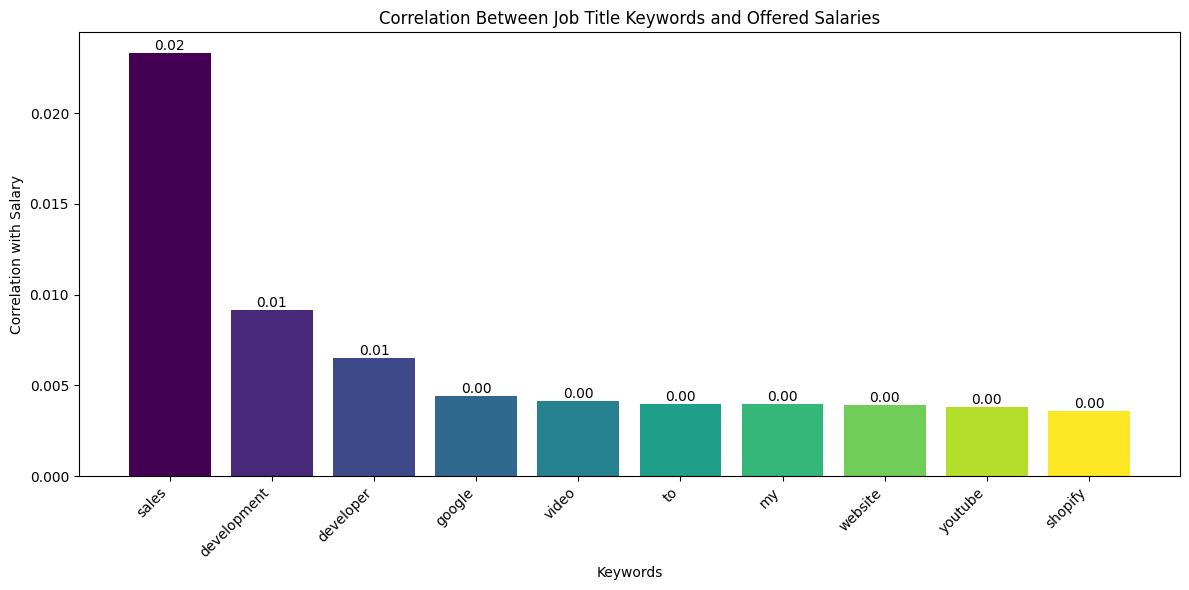

In [ ]:

# Convert the list of keywords back to a string for easier analysis
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=50)  # Adjust max_features as needed
tfidf_matrix = tfidf.fit_transform(df['keywords_str'])

# Convert the sparse matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

# Create a dataframe from the TF-IDF array
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())


# Combine TF-IDF scores with salaries
keyword_salary_df = pd.concat([df['budget'], tfidf_df], axis=1)


# Calculate the correlation between each keyword and salary
correlations = keyword_salary_df.corr()['budget'].drop('budget')


# Select top keywords with highest absolute correlation values
top_keywords = correlations.abs().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))

# Customize colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(top_keywords)))  # Use a colormap for variety

bars = plt.bar(top_keywords.index, top_keywords.values, color=colors)

# Add value labels to the bars
for bar, value in zip(bars, top_keywords.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')


plt.xlabel("Keywords")
plt.ylabel("Correlation with Salary")
plt.title("Correlation Between Job Title Keywords and Offered Salaries")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**Most used 10 keywords with salary for  each of the country united states,india, Canada,German,Australia**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


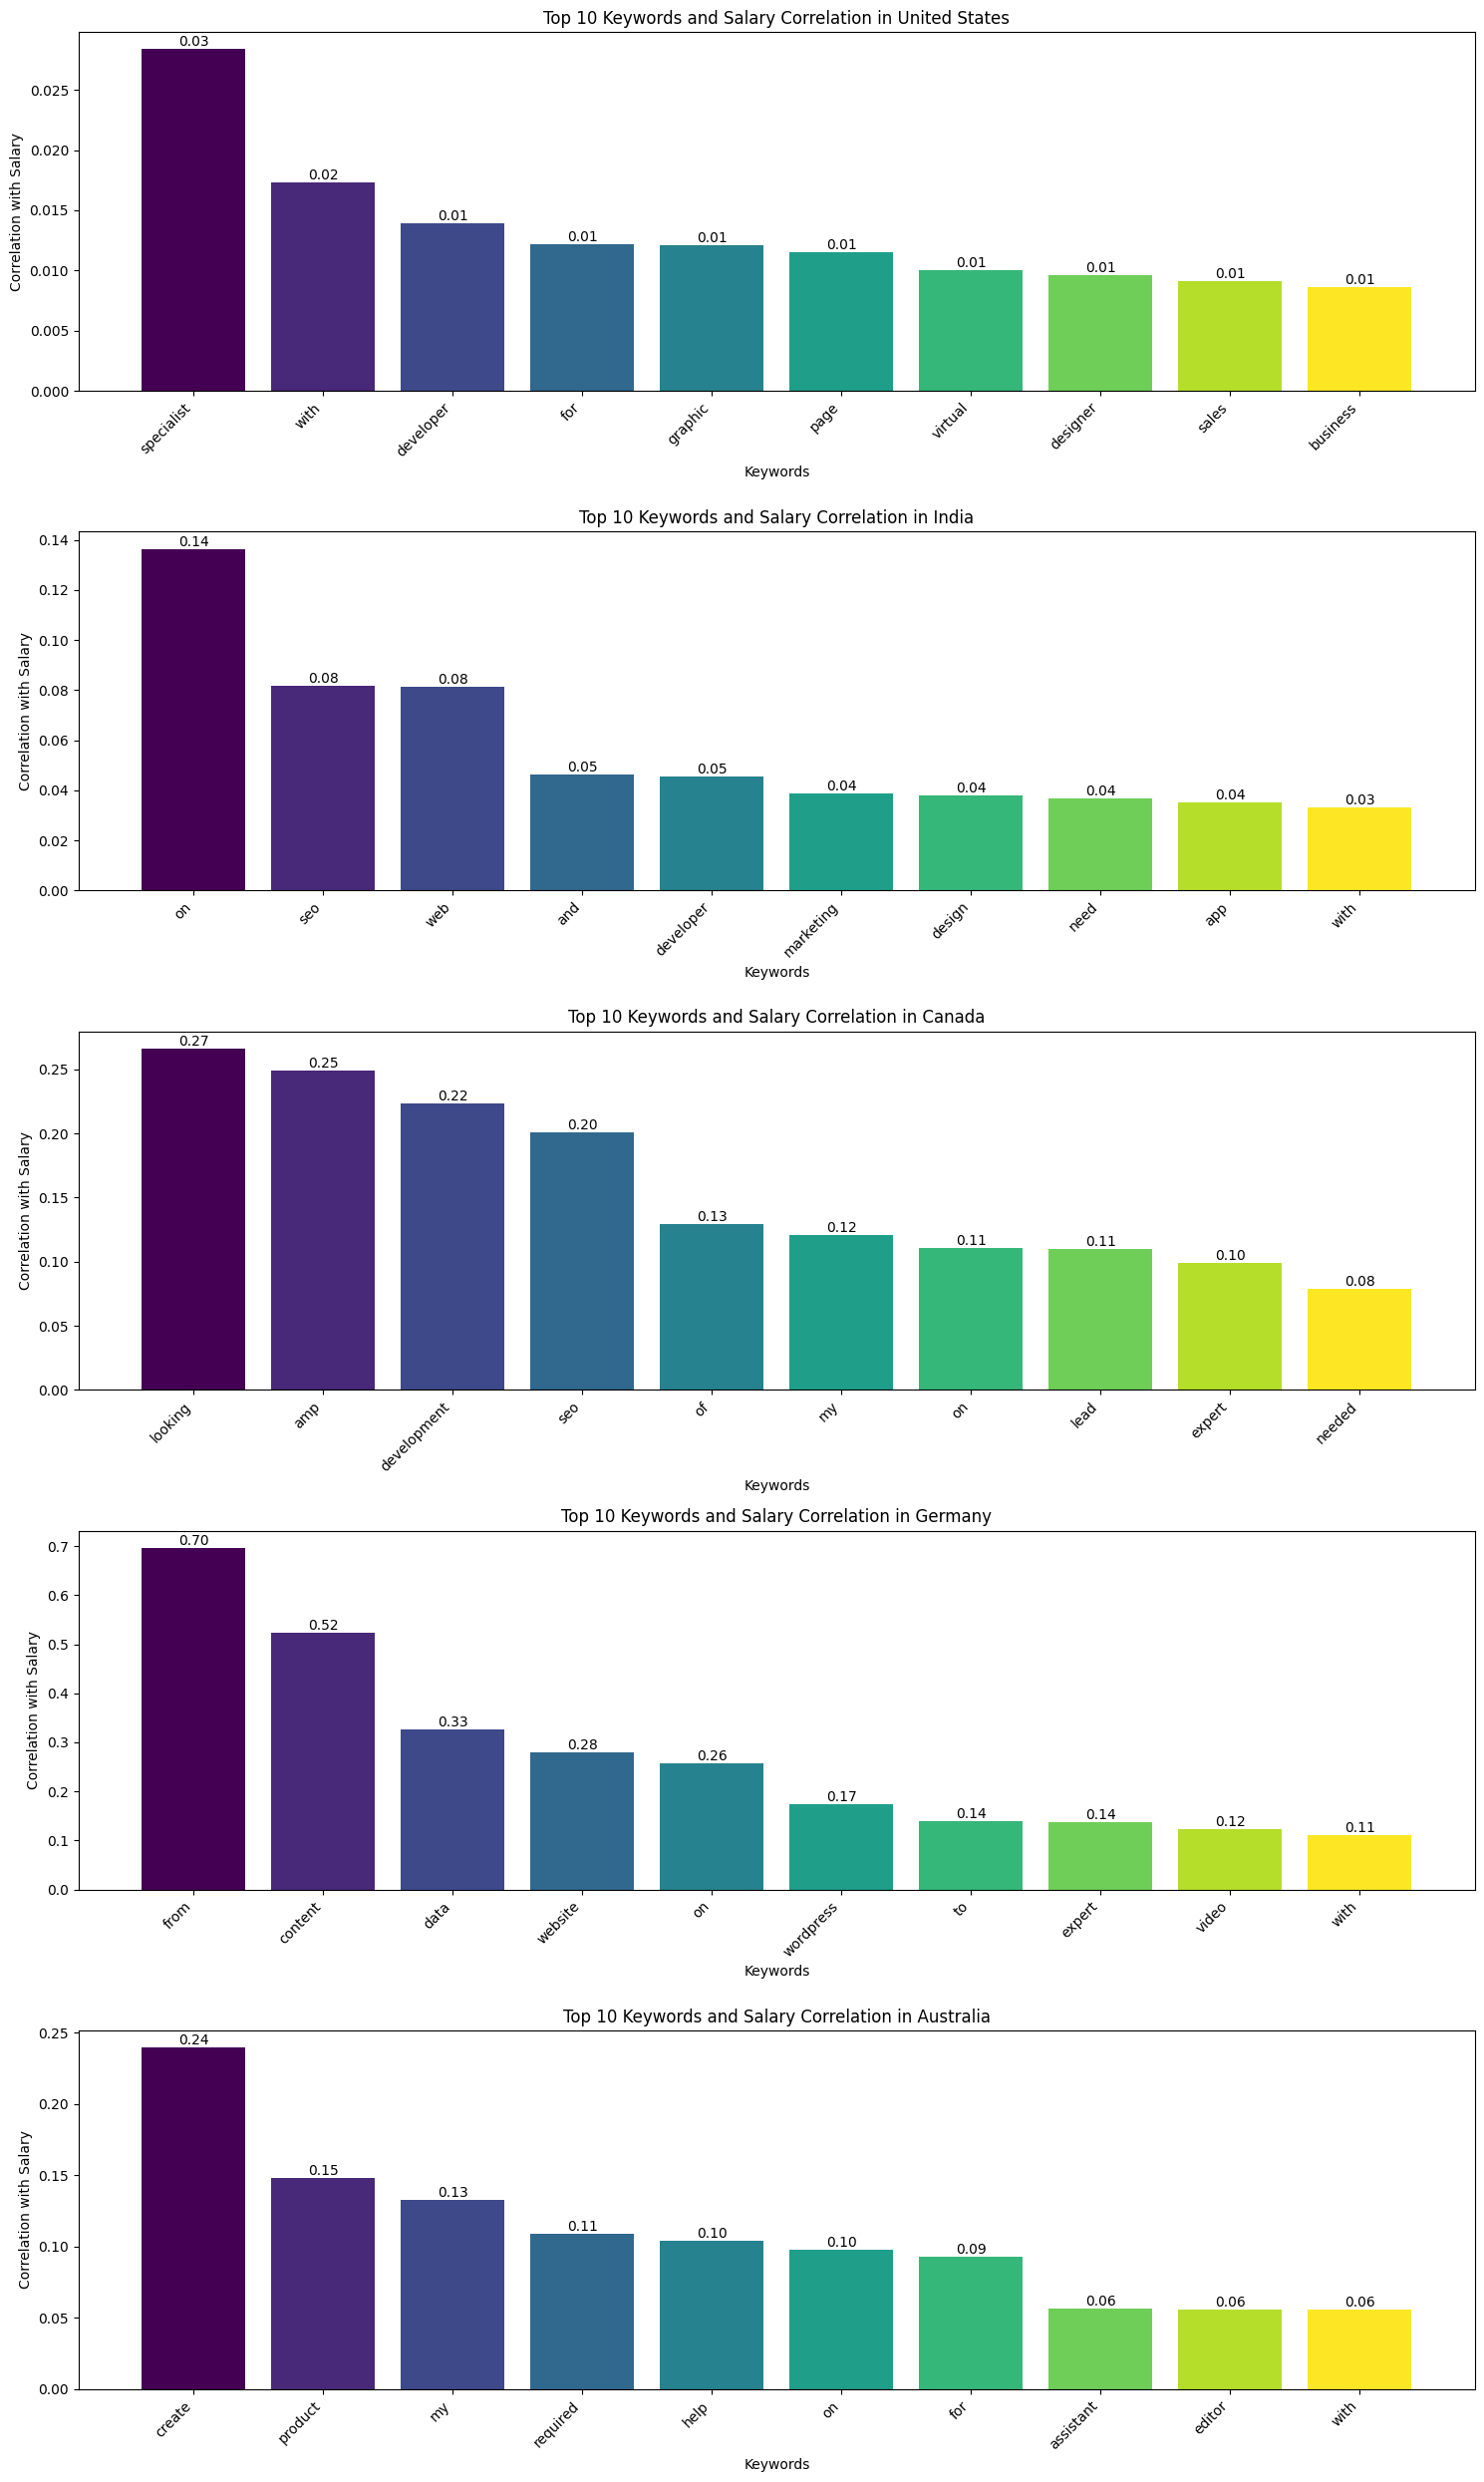

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

# Download necessary NLTK data (only needed once)
nltk.download('punkt')

df = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

df['keywords'] = df['title'].apply(extract_keywords)
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Convert 'budget' column to numeric, coercing errors to NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

countries = ['United States', 'India', 'Canada', 'Germany', 'Australia']
plt.figure(figsize=(15, 25)) # Adjust figure size to accommodate multiple subplots

for i, country in enumerate(countries):
    # Filter data for the current country
    df_country = df[df['country'] == country]

    # Handle cases where there might be no data for a country
    if df_country.empty:
        print(f"No data found for {country}. Skipping.")
        continue

    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df_country['keywords_str'])
    tfidf_array = tfidf_matrix.toarray()
    tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())

    keyword_salary_df = pd.concat([df_country['budget'], tfidf_df], axis=1)
    correlations = keyword_salary_df.corr()['budget'].drop('budget')
    top_keywords = correlations.abs().sort_values(ascending=False).head(10)

    plt.subplot(5, 1, i+1)
    colors = plt.cm.get_cmap('viridis', len(top_keywords))
    bars = plt.bar(top_keywords.index, top_keywords.values, color=colors(range(len(top_keywords))))

    for bar, value in zip(bars, top_keywords.values):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

    plt.xlabel("Keywords")
    plt.ylabel("Correlation with Salary")
    plt.title(f"Top 10 Keywords and Salary Correlation in {country}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()


**Task 2: Identify emerging job categories based on posting frequency
● Objective: To identify new and emerging job categories by analyzing the frequency and
trend of job postings. Display the 10 jobs with all different colors**

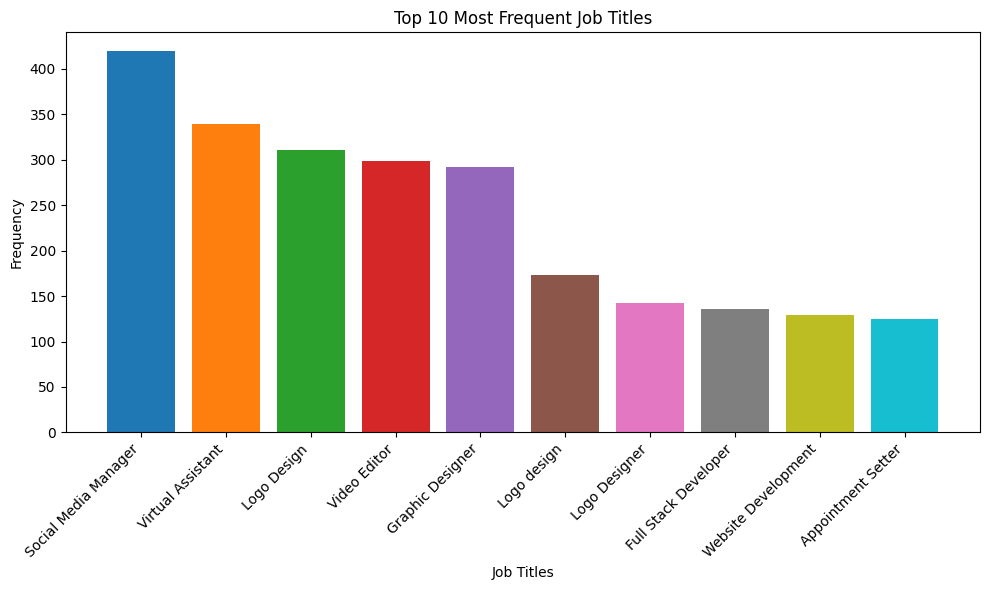

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'df' is your DataFrame and 'title' column contains job titles
# If not, replace 'df' and 'title' with your actual DataFrame and column name

def count_job_titles(df):
    """
    Counts the frequency of job titles and returns the top 10.
    """
    title_counts = Counter(df['title'])
    top_10_titles = title_counts.most_common(10)  # Get the top 10 most frequent job titles

    return top_10_titles


def plot_top_job_titles(top_jobs):
    """
    Plots the top 10 job titles with different colors.
    """
    titles, counts = zip(*top_jobs)

    colors = plt.cm.get_cmap('tab10', len(titles))  # Use a colormap for distinct colors

    plt.figure(figsize=(10, 6))
    bars = plt.bar(titles, counts, color=colors(range(len(titles))))

    plt.xlabel("Job Titles")
    plt.ylabel("Frequency")
    plt.title("Top 10 Most Frequent Job Titles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_jobs = count_job_titles(df)
plot_top_job_titles(top_jobs)


**Task-3-Predict high-demand job roles by analyzing job posting patterns over time To forecast high-demand job roles based on historical job posting data.**

**A predictive model with accuracy metrics, and a visual representation of demand trends over time. Use different models and share the accuracy scores**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')


# Split data (already done in your code, but repeating here for clarity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate multiple classification models

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.8304333619246007
Random Forest Accuracy: 0.8407466405260793
Naive Bayes Accuracy: 0.8295960462361639


**save the random forest model in a pickle file**

In [ ]:


import pickle
# Assuming 'model' is your trained RandomForestClassifier
filename = 'random_forest_model.pkl'  # Choose a filename for your saved model
pickle.dump(model, open(filename, 'wb'))


**save the vectorizer used above in a pickle file**

In [ ]:


# Assuming 'vectorizer' is the TfidfVectorizer object you used above.
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))


**Build a LSTM model , build,compile,train and predict, then save the model in pickle file, use word tokenizer, vader sentiment analyzer**

In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming 'df' is already prepared as in the previous code

# Prepare the data
X = df[['title', 'country']] # Features
y = df['budget'] # Target variable

# Preprocess text data (title)
tokenizer = Tokenizer(num_words=5000) # Adjust num_words as needed
tokenizer.fit_on_texts(X['title'].astype(str)) # Convert to string to avoid error
X_title_seq = tokenizer.texts_to_sequences(X['title'].astype(str))
X_title_padded = pad_sequences(X_title_seq, maxlen=100) # Adjust maxlen

# Encode categorical features (country)
label_encoder = LabelEncoder()
X['country'] = label_encoder.fit_transform(X['country'])


# Scale numerical features (budget) if needed (optional)

# Combine features
X_combined = np.hstack([X_title_padded, X['country'].values.reshape(-1, 1)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=X_train.shape[1])) # Adjust input_length
model.add(LSTM(64))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mse') # Use mse for regression

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1) # Adjust parameters


# Make predictions
predictions = model.predict(X_test)

#Save the model to a pickle file
filename = 'lstm_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#Load the model from the pickle file
loaded_model = pickle.load(open(filename, 'rb'))


Epoch 1/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 373s 67ms/step - loss: 109769040.0000 - val_loss: 169312352.0000
Epoch 2/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 370s 67ms/step - loss: 129062368.0000 - val_loss: 169257248.0000
Epoch 3/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 383s 67ms/step - loss: 67837872.0000 - val_loss: 169227728.0000
Epoch 4/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 369s 67ms/step - loss: 81099816.0000 - val_loss: 169212912.0000
Epoch 5/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 382s 67ms/step - loss: 59443560.0000 - val_loss: 169183664.0000
Epoch 6/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 366s 66ms/step - loss: 98180400.0000 - val_loss: 169166880.0000
Epoch 7/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 384s 67ms/step - loss: 109086952.0000 - val_loss: 169149776.0000
Epoch 8/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 382s 67ms/step - loss: 86832896.0000 - val_loss: 169132080.0000
Epoch 9/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 380s 66ms/step - loss: 147540400.0000 - val_loss: 169137120.0000
Epoch 10/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━

**Task-3-Predict high-demand job roles by analyzing job posting patterns over time  To forecast high-demand job roles based on historical job posting data.**

**A predictive model with accuracy metrics, and a visual representation of
demand trends over time. Use different models and share the accuracy scores**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

# ... (rest of your existing code)

def predict_job_demand(df, target_variable='budget'):
    # Prepare the data
    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df['keywords_str'])
    X = tfidf_matrix.toarray()  # Features
    y = df[target_variable]    # Target variable (e.g., budget or frequency)

    # Handle missing target values
    X = X[~y.isna()]
    y = y[~y.isna()]

    scaler = MinMaxScaler()
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

    # Train multiple models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"model": model, "mse": mse, "r2": r2}
        print(f"{name}: MSE={mse:.2f}, R^2={r2:.2f}")

    return results, tfidf, scaler

# Predict job demand based on budget
results, tfidf_vectorizer, scaler = predict_job_demand(df)

# Example: predict demand for a new job title using the best model (Random Forest in this example)
new_job_title = "Python Data Scientist"
new_job_keywords = extract_keywords(new_job_title)
new_job_keywords_str = ' '.join(map(str, new_job_keywords))
new_job_tfidf = tfidf_vectorizer.transform([new_job_keywords_str])
predicted_demand_scaled =  results["Random Forest"]["model"].predict(new_job_tfidf)
predicted_demand = scaler.inverse_transform(predicted_demand_scaled.reshape(-1,1))
print(f"Predicted demand for '{new_job_title}': {predicted_demand[0][0]}")


Linear Regression: MSE=0.00, R^2=0.00
Random Forest: MSE=0.00, R^2=-0.08
Predicted demand for 'Python Data Scientist': 459.28495886154707


**Task 4: Compare average hourly rates across different countries
● Objective: To compare and analyze the average hourly rates offered across different geographical locations.
● Deliverables: An interactive map or chart showing hourly rates by country.**

In [ ]:
import plotly.express as px

# Calculate the average hourly rate per country
average_hourly_rates = df.groupby('country')['budget'].mean().reset_index()

# Create the interactive map using Plotly Express
fig = px.choropleth(average_hourly_rates,
                    locations="country",
                    locationmode='country names',  # Specify locationmode
                    color="budget",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title="Average Hourly Rates by Country")

#fig.show()


**Task 5: Create a job recommendation engine based on current job postings
● Objective: To develop a personalized job recommendation engine.
● Deliverables: A working prototype of the recommendation engine, API documentation,
and a user interface for interaction.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display


#Load and preprocess data
df = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')
df['title'].fillna("", inplace=True)  # Handle missing titles

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['title'])

#Create the recommended Function
def recommend_jobs(user_description, top_n=5):
    user_tfidf = tfidf.transform([user_description])
    cos_similarities = cosine_similarity(user_tfidf, tfidf_matrix)
    related_docs_indices = cos_similarities.argsort()[0][::-1][1:top_n+1]
    recommendations = df.iloc[related_docs_indices][['title', 'link', 'budget','country']]
    return recommendations.to_dict(orient='records')

#Build User Interface
name_input = widgets.Text(placeholder='Enter your name')
job_role_dropdown = widgets.Dropdown(
    options=['Data Scientist', 'Developer', 'YouTuber', 'Sales', 'Data Engineer','SEO','Report Analysis','Fashion Designer'],
    description='Job Role:'
)
recommend_button = widgets.Button(description="Recommend Jobs")

output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        name = name_input.value
        job_role = job_role_dropdown.value
        recommendations = recommend_jobs(job_role, top_n=5)
        print(f"Hello, {name}! Here are some job recommendations for {job_role}s:")
        for rec in recommendations:
            print(f"- {rec['title']}, Budget: {rec['budget']}, Country: {rec['country']}, Link: {rec['link']}")

recommend_button.on_click(on_button_clicked)

display(name_input, job_role_dropdown, recommend_button, output)





Text(value='', placeholder='Enter your name')

Dropdown(description='Job Role:', options=('Data Scientist', 'Developer', 'YouTuber', 'Sales', 'Data Engineer'…

Button(description='Recommend Jobs', style=ButtonStyle())

Output()

**Create an user interface for interaction. asking name, job role , country with a drop down option for selection with Data scientist, Developer, YouTuber ,Sales, Data Engineer, Data Scientist, 'SEO',' Report Analysis', 'Fashion Designer'. Create a job recommendation engine based on current job postings**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display

# Load and preprocess data
df = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')
df['title'].fillna("", inplace=True)  # Handle missing titles

# Get unique countries from the DataFrame
countries = df['country'].dropna().unique().tolist()

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['title'])

# Recommendation function (modified to include country filtering)
def recommend_jobs(user_description, country, top_n=5):
    user_tfidf = tfidf.transform([user_description])
    cos_similarities = cosine_similarity(user_tfidf, tfidf_matrix)

    # Filter DataFrame by country before getting recommendations
    filtered_df = df[df['country'] == country]
    # Calculate related_docs_indices based on filtered_df
    cos_similarities_filtered = cosine_similarity(user_tfidf, tfidf.transform(filtered_df['title']))
    related_docs_indices_filtered = cos_similarities_filtered.argsort()[0][::-1][1:top_n + 1]

    # Get the original indices from filtered_df
    related_docs_indices = filtered_df.index[related_docs_indices_filtered].tolist()


    recommendations = df.iloc[related_docs_indices][['title', 'link', 'budget', 'country']]
    return recommendations.to_dict(orient='records')

# Build user interface
name_input = widgets.Text(placeholder='Enter your name')
job_role_dropdown = widgets.Dropdown(
    options=['Data Scientist', 'Developer', 'YouTuber', 'Sales', 'Data Engineer', 'SEO', 'Report Analysis', 'Fashion Designer'],
    description='Job Role:'
)
country_dropdown = widgets.Dropdown(
    options=countries,
    description='Country:'
)
recommend_button = widgets.Button(description="Recommend Jobs")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        name = name_input.value
        job_role = job_role_dropdown.value
        country = country_dropdown.value  # Get selected country
        recommendations = recommend_jobs(job_role, country, top_n=5)
        print(f"Hello, {name}! Here are some job recommendations for {job_role}s in {country}:")
        for rec in recommendations:
            print(f"- {rec['title']}, Budget: {rec['budget']}, Country: {rec['country']}, Link: {rec['link']}")

recommend_button.on_click(on_button_clicked)

display(name_input, job_role_dropdown, country_dropdown, recommend_button, output)

Text(value='', placeholder='Enter your name')

Dropdown(description='Job Role:', options=('Data Scientist', 'Developer', 'YouTuber', 'Sales', 'Data Engineer'…

Dropdown(description='Country:', options=('United States', 'India', 'Portugal', 'Germany', 'Canada', 'Singapor…

Button(description='Recommend Jobs', style=ButtonStyle())

Output()

**Track changes in job market dynamics over months usimg ARIMA .SARIMA MODEL**

**Task 6: Track changes in job market dynamics over months
● Objective: To monitor and track the changes in job market dynamics.
● Deliverables: A dashboard that updates monthly with new trends in the job market.**

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


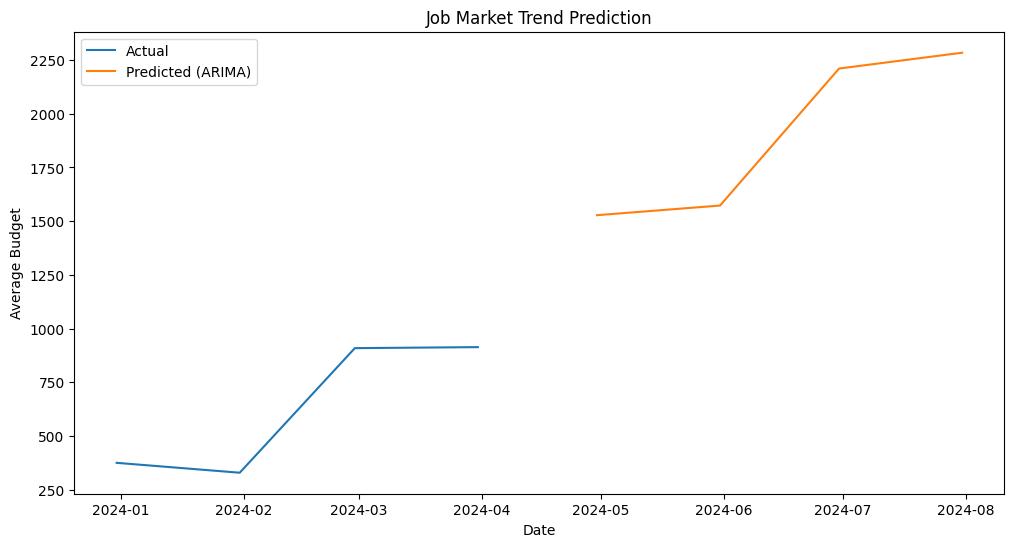

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load your data (replace with your actual data loading)
df = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

# Preprocessing (assuming you have 'date' and 'budget' columns)
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['published_date'])
# Set the 'date' column as the index
df = df.set_index('date')

# Aggregate data to monthly level (if needed)
df_monthly = df.resample('M')['budget'].mean() # Change 'budget' to your actual column name


# Choose the appropriate model and parameters
# For example, we try ARIMA (you might need to determine the order (p, d, q) through ACF/PACF plots)
model = ARIMA(df_monthly, order=(5,1,0)) # Example order, change as needed
# Fit the model
model_fit = model.fit()
# Make predictions for the next few months (replace 3 with your desired number of predictions)
predictions = model_fit.predict(start=len(df_monthly), end=len(df_monthly) + 3)
# Print or visualize predictions


# SARIMA example (if you have seasonality)
# seasonal_order = (p,d,q,s) where 's' is the periodicity (e.g. 12 for monthly data)
#sarima_model = SARIMAX(df_monthly, order=(5,1,0), seasonal_order=(1,1,1,12))
#sarima_fit = sarima_model.fit()
#predictions_sarima = sarima_fit.predict(start=len(df_monthly), end=len(df_monthly) + 3)
# Print or visualize predictions

# Plotting (replace with your actual plotting based on your model choices)
plt.figure(figsize=(12, 6))
plt.plot(df_monthly, label='Actual')
plt.plot(predictions, label='Predicted (ARIMA)')
#plt.plot(predictions_sarima, label="Predicted (SARIMA)")
plt.legend()
plt.title('Job Market Trend Prediction')
plt.xlabel('Date')
plt.ylabel('Average Budget')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your dataframe is named 'df' and has a 'date_posted' column
# Convert 'date_posted' to datetime objects if it's not already
df['date_posted'] = pd.to_datetime(df['date_posted'])

# Extract month and year and convert to string
df['month_year'] = df['date_posted'].dt.strftime('%Y-%m')  # Convert to string

# Group by month and year, count job postings
monthly_job_counts = df.groupby('month_year')['title'].count().reset_index()

# Rename columns for clarity
monthly_job_counts.columns = ['Month-Year', 'Job Postings']

# Create an interactive line chart using Plotly
fig = px.line(monthly_job_counts,
              x='Month-Year',
              y='Job Postings',
              title='Job Postings Over Time',
              labels={'Month-Year': 'Month', 'Job Postings': 'Number of Job Postings'})

fig.update_xaxes(
    dtick="M1",  # Set the tick interval to 1 month
    tickformat="%b\n%Y"  # Format the ticks as "Month\nYear" (e.g., Jan\n2024)
)

fig.show()

**Task 7: Investigate trends in the remote work landscape
● Objective: To analyze trends and shifts towards remote work.
● Deliverables: A comprehensive report on remote work trends with data-backed forecasts.**

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your dataframe is named 'df' and has a 'title' and 'date_posted' column
# Convert 'date_posted' to datetime objects if it's not already
df['date_posted'] = pd.to_datetime(df['date_posted'])

# Extract month and year
df['month_year'] = df['date_posted'].dt.strftime('%Y-%m')  # Convert to string for grouping

# Identify remote jobs based on keywords in the title (customize keywords as needed)
remote_keywords = ['remote', 'work from home', 'telecommute', 'virtual']  # Add more keywords
df['remote'] = df['title'].str.contains('|'.join(remote_keywords), case=False)

# Group by month and year, count remote and non-remote jobs
remote_trends = df.groupby(['month_year', 'remote'])['title'].count().unstack(fill_value=0)

# Rename columns for clarity (optional)
remote_trends.columns = ['Non-Remote', 'Remote']

# Calculate the percentage of remote jobs each month
remote_trends['Total Jobs'] = remote_trends.sum(axis=1)
remote_trends['Remote Percentage'] = (remote_trends['Remote'] / remote_trends['Total Jobs']) * 100

# Create an interactive line chart
fig = px.line(remote_trends,
              x=remote_trends.index,
              y='Remote Percentage',
              title='Percentage of Remote Jobs Over Time',
              labels={'x': 'Month', 'Remote Percentage': 'Percentage of Remote Jobs'})

fig.show()


# Forecasting (example using simple moving average)
window_size = 3  # Adjust window size as needed
remote_trends['SMA'] = remote_trends['Remote Percentage'].rolling(window=window_size).mean()

# Add the forecast to the plot

